## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from Funtion_model import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Scaling the imbalance (upsampling)

In [3]:
data1['fetal_health'].value_counts()

A    1646
B     292
C     175
Name: fetal_health, dtype: int64

In [4]:
# Here 1600 samples are extracted from 'A', and double the numbers of samples of 'B' and 'C'
A = data1[data1['fetal_health'] == 'A'].sample(1600) 
B = data1[data1['fetal_health'] == 'B'].sample(1600, replace=True)
C = data1[data1['fetal_health'] == 'C'].sample(1600, replace=True)
   
upsample_df = pd.concat([A, B, C]).sample(frac=1) 
# .sample(frac=1)':' here is just to shuffle the dataframe\n"

In [5]:
upsample_df.shape

(4800, 15)

In [6]:
upsample_df['fetal_health'].value_counts()

C    1600
A    1600
B    1600
Name: fetal_health, dtype: int64

## Train the model

In [7]:
X_up = upsample_df.drop('fetal_health', axis = 1)
y_up = upsample_df['fetal_health']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

In [9]:
# Check if train set and test set were saved in the variable correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3840, 14), (960, 14), (3840,), (960,))

In [10]:
X_train

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
980,77.348650,-1.833548,-3.904537,-1.363542,-1.677820,14.062134,-1.698371,7.498550,-0.229605,13.261117,1.339612,1.253648,53149.942412,2.022116
2018,76.310492,-1.833548,-3.904537,-1.363542,-1.672667,34.285188,-1.698371,7.498550,-0.229605,18.791260,1.339612,2.228554,53149.942412,2.514309
2027,75.790601,-1.833548,-3.904537,-1.363542,-1.646156,33.422585,-1.698371,7.498550,-0.229605,19.474752,1.339612,1.639072,53149.942412,3.178882
1417,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,23.988171,-1.698371,0.000000,-0.229605,11.309256,1.339612,0.000000,53149.942412,1.122632
7,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,41.422260,-1.698371,3.039662,-0.229605,15.555308,1.339612,1.738371,53149.942412,1.122632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,22.571797,-1.698371,7.498550,-0.229605,23.606501,1.339612,2.877034,53149.942412,2.022116
442,83.021340,-1.833548,-3.904537,-1.363542,-1.677820,35.142541,-1.698371,7.498550,-0.229605,5.990340,1.339612,0.000000,53149.942412,3.219352
1427,85.069252,-1.833548,-3.904537,-1.363542,-1.677820,21.615679,-1.698371,7.498550,-0.229605,12.795191,1.339612,1.253648,53149.942412,1.661337
1222,74.227625,-1.833548,-3.904537,-1.363542,-1.724557,17.681924,-1.698371,1.505040,-0.229605,12.152331,1.339612,0.000000,53149.942412,1.122632


## Scaling the numericals (StandardScaler)

In [11]:
# Apply Standard scaler to the train set and test set
transformer = StandardScaler().fit(X_train)
X_train = transformer.transform(X_train)

In [12]:
# Check if the transformer was applied to the test set correctly
X_train

array([[-0.41771725,  0.27555695,  1.        , ..., -0.24401772,
         0.19920027, -0.35470496],
       [-0.61813138,  0.27555695,  1.        , ...,  0.73521894,
         0.19920027, -0.0591658 ],
       [-0.71849511,  0.27555695,  1.        , ...,  0.14311818,
         0.19920027,  0.33987902],
       ...,
       [ 1.07272812,  0.27555695,  1.        , ..., -0.24401772,
         0.19920027, -0.57133589],
       [-1.0202242 ,  0.27555695,  1.        , ..., -1.50323551,
         0.19920027, -0.89480265],
       [-0.21771488,  0.27555695,  1.        , ..., -0.74702717,
         0.19920027, -1.14697742]])

In [13]:
transformer = StandardScaler().fit(X_test)
X_test = transformer.transform(X_test)


In [14]:
# Check if the transformer was applied to the test set correctly
X_test

array([[ 1.26925376,  0.27828237,  1.        , ..., -0.72273673,
         0.20022908,  0.35210658],
       [ 2.34014435,  0.27828237,  1.        , ...,  0.26316097,
         0.20022908,  0.35210658],
       [-0.60643104,  0.27828237,  1.        , ...,  1.20740513,
         0.20022908, -0.07409115],
       ...,
       [-0.10942426,  0.27828237,  1.        , ..., -1.47589818,
         0.20022908,  0.48002158],
       [ 0.97535938,  0.27828237,  1.        , ..., -0.72273673,
         0.20022908, -1.16923261],
       [ 1.56234667,  0.27828237,  1.        , ..., -0.72273673,
         0.20022908, -1.59398862]])

## Model evaluation of upsampling metrix
+ Here we will test on Logistic Regression, KNN and Random Forest
+ Using functions from .py file

### Logistic regression

1) Logistic regression score: 0.7020833333333333
2) Confustion metrix:
[[219  57  40]
 [ 58 211  43]
 [ 37  51 244]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.70      0.69      0.70       316
           B       0.66      0.68      0.67       312
           C       0.75      0.73      0.74       332

    accuracy                           0.70       960
   macro avg       0.70      0.70      0.70       960
weighted avg       0.70      0.70      0.70       960



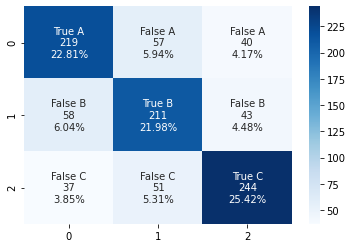

In [15]:
logistic_regression(X_train, y_train, X_test, y_test)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [16]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.9666666666666667,
 0.9385416666666667,
 0.909375,
 0.903125,
 0.8916666666666667,
 0.8677083333333333,
 0.8583333333333333,
 0.8520833333333333,
 0.853125,
 0.8364583333333333]

Text(0, 0.5, 'Accuracy')

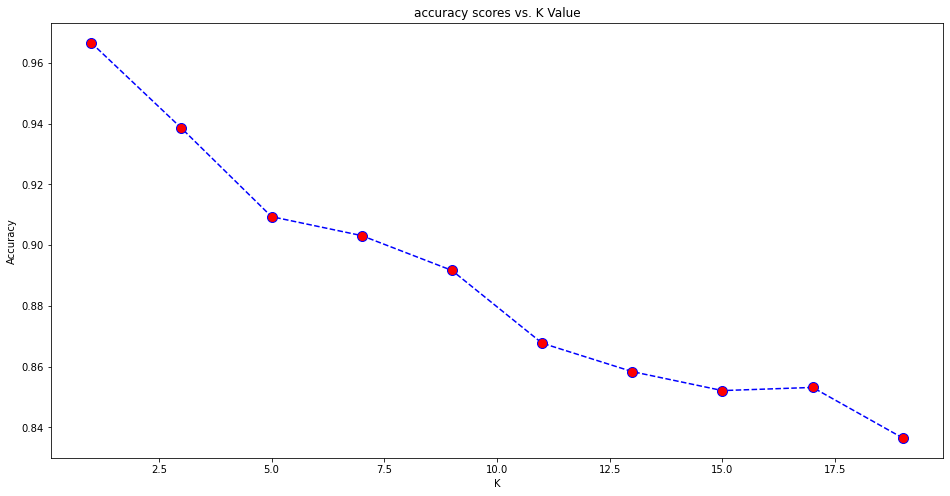

In [17]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Apply into KNN model
Use funtion from .py file

In [18]:
knn_classifier(X_train, y_train, X_test, y_test, 10)

1) KNN Classifier accuracy score:
0.8822916666666667
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.89      0.78      0.83       316
           B       0.85      0.91      0.88       312
           C       0.91      0.95      0.93       332

    accuracy                           0.88       960
   macro avg       0.88      0.88      0.88       960
weighted avg       0.88      0.88      0.88       960



### Random Forest
Using funtion from .py file

In [19]:
random_forest(X_train, y_train, X_test, y_test)

1) Random forest accuracy score: 0.8447916666666667


In [20]:
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

NameError: name 'recall_score' is not defined